In [242]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

In [243]:
io = r'/home/gg/cv_works/train_data.xls'

In [244]:
cust_df = pd.read_excel(io)

In [245]:
cust_df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   编号       351 non-null    int64  
 1   性别 男1女0  351 non-null    int64  
 2   籍贯       351 non-null    object 
 3   身高(cm)   351 non-null    float64
 4   体重(kg)   351 non-null    float64
 5   鞋码       351 non-null    float64
 6   50米成绩    351 non-null    float64
 7   肺活量      351 non-null    int64  
 8   喜欢颜色     351 non-null    object 
 9   喜欢运动     351 non-null    int64  
 10  喜欢文学     351 non-null    int64  
 11  喜欢数学     0 non-null      float64
 12  喜欢模式识别   0 non-null      float64
dtypes: float64(6), int64(5), object(2)
memory usage: 35.8+ KB


In [246]:
del(cust_df['喜欢数学'])
del(cust_df['喜欢模式识别'])

In [247]:
cust_df_new=cust_df.dropna()

In [248]:
cust_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   编号       351 non-null    int64  
 1   性别 男1女0  351 non-null    int64  
 2   籍贯       351 non-null    object 
 3   身高(cm)   351 non-null    float64
 4   体重(kg)   351 non-null    float64
 5   鞋码       351 non-null    float64
 6   50米成绩    351 non-null    float64
 7   肺活量      351 non-null    int64  
 8   喜欢颜色     351 non-null    object 
 9   喜欢运动     351 non-null    int64  
 10  喜欢文学     351 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 32.9+ KB


In [249]:
cust_df_new = np.array([cust_df_new['身高(cm)'].tolist(),
                       cust_df_new['体重(kg)'].tolist(),
                       cust_df_new['50米成绩'].tolist()]
                       #cust_df_new['肺活量'].tolist()]
                       ,np.float32)

In [250]:
newarr=cust_df_new.T

In [251]:
pred = KMeans(n_clusters=2,n_init=5,max_iter=10).fit_predict(newarr)

In [252]:
print(pred)

[0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0]


In [253]:
fe_num=newarr
ma_num=newarr
tird_num=newarr
op=0
dp=0
lp=0
for i in range(len(fe_num)):
    if(pred[i]==0):
        op+=1
for j in range(len(ma_num)):
    if(pred[j]==1):
        dp+=1
for k in range(len(tird_num)):
    if(pred[k]==2):
        lp+=1
        
print(op,dp,lp)
        

190 161 0


In [230]:
te_fe=np.zeros((190,3))
te_ma=np.zeros((160,3))
te_third=np.zeros((157,3))
loop1=0
loop2=0
loop3=0 

In [231]:
for i in range(len(newarr)):
    if pred[i]==0:
        te_fe[loop1]=newarr[i]
        loop1+=1
for i in range(len(newarr)):
    if pred[i]==1:
        te_ma[loop2]=newarr[i]
        loop2+=1 
for i in range(len(newarr)):
    if pred[i]==2:
        te_third[loop3]=newarr[i]
        loop3+=1 

In [237]:
print(len(te_third))

157


In [233]:
te_ma_t=te_ma.T
te_fe_t=te_fe.T
te_third_t=te_third.T

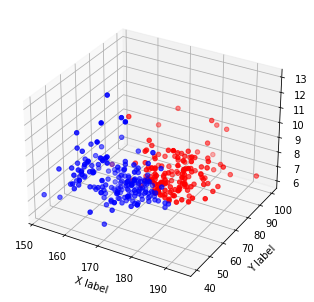

In [238]:
from mpl_toolkits.mplot3d import Axes3D
a,b,c=te_ma_t[0],te_ma_t[1],te_ma_t[2]
xs3,ys3,zs3=te_fe_t[0],te_fe_t[1],te_fe_t[2]
#xs2,ys2,zs2=te_third_t[0],te_third_t[1],te_third_t[2]



fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。

 # 画出(xs1,ys1,zs1)的散点图。
ax.scatter(a,b,c,c='r')
#ax.scatter(xs2,ys2,zs2,c='y')
ax.scatter(xs3,ys3,zs3,c='b')

ax.set_xlabel('X label') # 画出坐标轴
ax.set_ylabel('Y label')
#ax.set_zlabel('Z label')

plt.show()